# Activity Classification - DNN1 Final Model

This notebook trains our final model for the first Deep Neural Network on the physical activity dataset.


## Load Data and Prepare Training Set

In [13]:
%reset -f

import importlib
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import activity_functions
importlib.reload(activity_functions)
from activity_functions import *

In [14]:
activtity = load_data()

Loaded from Kaggle: /home/thuy/.cache/kagglehub/datasets/diegosilvadefrana/fisical-activity-dataset/versions/4/dataset2.csv


In [15]:
df_train, df_test = create_train_test(activtity, test_ratio=0.2)

In [16]:
X_train, y_train, X_test, y_test = prepare_for_train(df_train, df_test)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## Train

In [18]:
model = final_build_dnn1()

W0000 00:00:1765493859.247850 2892324 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Model Summary

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 473,101 (1.80 MB)

 Trainable params: 473,101 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

## History Train

In [20]:
history = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=100,
    batch_size=1024,
    verbose=1
)

Epoch 1/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 202s 88ms/step - accuracy: 0.8453 - loss: 1.2169 - val_accuracy: 0.9302 - val_loss: 0.5949
Epoch 2/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 155s 69ms/step - accuracy: 0.9251 - loss: 0.5120 - val_accuracy: 0.9537 - val_loss: 0.3673
Epoch 3/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 238s 85ms/step - accuracy: 0.9439 - loss: 0.3746 - val_accuracy: 0.9672 - val_loss: 0.2910
Epoch 4/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 205s 92ms/step - accuracy: 0.9537 - loss: 0.3187 - val_accuracy: 0.9739 - val_loss: 0.2532
Epoch 5/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 159s 71ms/step - accuracy: 0.9598 - loss: 0.2853 - val_accuracy: 0.9778 - val_loss: 0.2294
Epoch 6/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 246s 91ms/step - accuracy: 0.9638 - loss: 0.2622 - val_accuracy: 0.9791 - val_loss: 0.2171
Epoch 7/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 213s 69ms/step - accuracy: 0.9667 - loss: 0.2458 - val_accuracy: 0.9781 - val_loss: 0.2090
Epoch 8/100
2238/2238 ━━━━━━━━━━━━━━━━━━━━ 157s 70ms/step - ac

#### Accuracy Plot

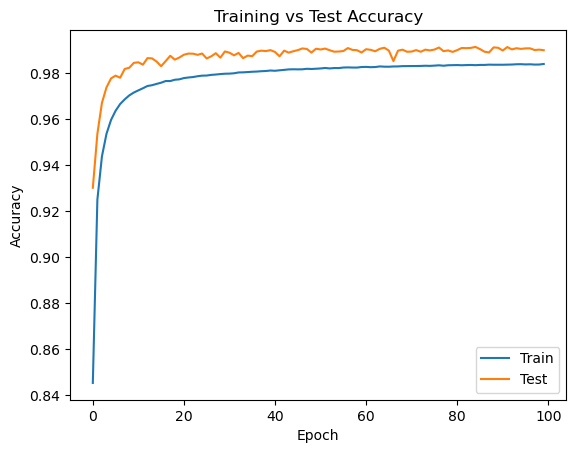

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy")
plt.legend(["Train", "Test"])
plt.show()

#### Loss Plot

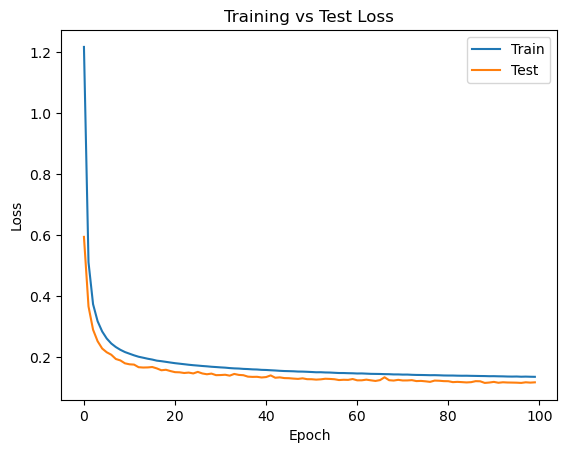

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend(["Train", "Test"])
plt.show()

## Model Evaluation

In [24]:
y_test_hat = model.predict(X_test)
y_test_pred = np.argmax(y_test_hat, axis=1)
compute_scores(y_test_encoded, y_test_pred, verbose=True)

17901/17901 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
Accuracy:  0.9901
F1-Score:  0.9892
Recall:    0.9930
Precision: 0.9855


,Accuracy,F1_Score,Recall,Precision
0,0.990128,0.989205,0.993003,0.985535
